Faça o upload do arquivo data.pkl com os dados fornecidos para a atividade. Use a célula de comando abaixo após a finalização do upload para a preparação do conteúdo do arquivo no colab.

In [9]:
import pickle
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
from tqdm import trange
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import torch.nn.functional as F

In [2]:
#=======================
# não altere essa célula
#=======================
with open('data.pkl', 'rb') as handle:
    dataset = pickle.load(handle)

training_data = list(zip(dataset['x'].astype(np.float32),dataset['y']))
test_data = list(zip(dataset['x_test'].astype(np.float32),dataset['y_test']))

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=100, shuffle=False)

O dataset representa uma tarefa de classificação com 10 classes e é composto por um input sequencial com 40 float features e um output inteiro contendo o índice da classe de cada amostra (i.e. de 0 a 9).

In [3]:
type(training_data)

list

In [4]:
training_data[0]

(array([-0.33200568, -0.47191036, -0.7786971 , -1.0097408 , -0.8823526 ,
         0.10393481,  1.6432843 ,  1.6525071 ,  0.6830781 , -0.3426375 ,
        -1.5214309 , -1.103984  , -0.01709391,  1.014668  ,  0.6235863 ,
        -0.02391367,  0.25410828,  0.8673926 ,  0.9354101 ,  1.035874  ,
         1.593488  ,  1.2368417 ,  0.4101985 , -0.21979299,  0.09805559,
         0.5301637 ,  0.5202782 ,  0.18998057,  0.07043655,  0.32433057,
         0.26860833, -0.57907736, -1.0934857 , -0.86458045, -0.11352962,
         0.01950092, -0.32821417, -0.7167305 , -0.9619582 , -0.8901664 ],
       dtype=float32),
 2)

In [5]:
len(training_data[0][0])

40

In [6]:
for X, y in train_dataloader:
    print(f"Shape of X [N, L]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, L]: torch.Size([32, 40])
Shape of y: torch.Size([32]) torch.int64


In [7]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


Altere as classes abaixo implementando os seguintes modelos:

1. modelo de classificação linear
2. mlp com no máximo 20k parâmetros (contando pesos e biases)
3. rede convolucional estilo LeNet
4. rede convolucional estilo VGG
5. rede convolucional estilo ResNet

(extra)
6. rede recorrente
7. rede estilo ViT

In [50]:
# Define model LinearNet
class LinearNet(nn.Module):
    def __init__(self):
        super().__init__()
        #TODO

    def forward(self, x):
        #TODO
        pass
#=============================================================================================================

#=============================================================================================================
# Define model MLPNet
class MLPNet(nn.Module):
    def __init__(self):
        super().__init__()
        #TODO

    def forward(self, x):
        #TODO
        pass
#=============================================================================================================

#=============================================================================================================
# Define model LeNet
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=4, kernel_size=5)
        self.pool1 = nn.AvgPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(in_channels=4, out_channels=10, kernel_size=5)
        self.pool2 = nn.AvgPool1d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv1d(in_channels=10, out_channels=20, kernel_size=5)
        self.pool3 = nn.AvgPool1d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=20 * 2, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=10)

    def forward(self, x):
        x = x.unsqueeze(1)  # Adiciona dimensão do canal, necessário para Conv1d

        x = self.pool1(F.tanh(self.conv1(x)))
        x = self.pool2(F.tanh(self.conv2(x)))
        x = self.pool3(F.tanh(self.conv3(x)))

        x = x.view(x.size(0), -1)  # Ajustar conforme necessário para manter o tamanho do batch

        x = F.tanh(self.fc1(x))
        x = self.fc2(x)

        return x
#=============================================================================================================

#=============================================================================================================
# Define model VGGNet
class VGGNet(nn.Module): #VGG baseado em uma LENET
    def __init__(self):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(

            # Bloco 1
            nn.Conv1d(1, 32, kernel_size=3, padding=1),# entra: 1x40, sai: 32x40
            nn.ReLU(inplace=True), # ativação
            nn.MaxPool1d(kernel_size=2, stride=2),# entra: 32x40, sai: 32x20

            # Bloco 2
            nn.Conv1d(32, 64, kernel_size=3, padding=1),# entra: 32x20, sai: 64x20
            nn.ReLU(inplace=True),# ativação
            nn.MaxPool1d(kernel_size=2, stride=2),# entra: 64x20, sai: 64x10
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 10, 120),# entra: 64*10=640, sai: 120
            nn.ReLU(inplace=True),# ativação
            nn.Linear(120, 84),# entra: 120, sai: 84
            nn.ReLU(inplace=True),# ativação
            nn.Linear(84, 10),# entra: 84, sai: 10 classes
        )

    def forward(self, x):
        x = x.unsqueeze(1)  # precisa adicionar a dimensão do canal: (batch_size, 1, 40)
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
#=============================================================================================================

#=============================================================================================================
# Define model ResNet
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, use_1x1conv=False, strides=1):
        super(ResidualBlock1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1, stride=strides) #primeira conv
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1) #segunda conv
        if use_1x1conv:
            self.conv3 = nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=strides) #caso queira aplicar uma conv 1x1 para alterar a dimensionalidade
                                                                                              #quando o shape de entrada e saida nao coincidirem
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm1d(out_channels) #camada de normalização em lote para a primeira conv
        self.bn2 = nn.BatchNorm1d(out_channels) #camada de normalização em lote para a segunda conv

    def forward(self, X):
        Y = nn.functional.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return nn.functional.relu(Y)

class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.b1 = nn.Sequential(nn.Conv1d(1, 64, kernel_size=7, stride=2, padding=3), #bloco inicial
                                nn.BatchNorm1d(64), nn.ReLU(),
                                nn.MaxPool1d(kernel_size=3, stride=2, padding=1))

        self.b2 = nn.Sequential(ResidualBlock1D(64, 64),
                                ResidualBlock1D(64, 64)) # bloco residual

        self.b3 = nn.Sequential(ResidualBlock1D(64, 128, use_1x1conv=True, strides=2),
                                ResidualBlock1D(128, 128)) # bloco residual

        self.b4 = nn.Sequential(ResidualBlock1D(128, 256, use_1x1conv=True, strides=2),
                                ResidualBlock1D(256, 256)) # bloco residual

        self.b5 = nn.Sequential(ResidualBlock1D(256, 512, use_1x1conv=True, strides=2),
                                ResidualBlock1D(512, 512)) # bloco residual

        self.fc = nn.Sequential(nn.AdaptiveAvgPool1d(1), nn.Flatten(),
                                nn.Linear(512, 10)) # camada final conectada a uma camada linear com as 10 classes de saida.

    def forward(self, X):
        X = X.unsqueeze(1)
        X = self.b1(X)
        X = self.b2(X)
        X = self.b3(X)
        X = self.b4(X)
        X = self.b5(X)
        return self.fc(X)
#=============================================================================================================

#=============================================================================================================
# Define model RecurrentNet
class RecurrentNet(nn.Module):
    def __init__(self):
        super().__init__()
        #TODO

    def forward(self, x):
        #TODO
        pass

# Define model ViTNet
class ViTNet(nn.Module):
    def __init__(self):
        super().__init__()
        #TODO

    def forward(self, x):
        #TODO
        pass

Escolha o modelo implementado, a função de custo e o otimizador e treine o modelo até atingir a melhor acurácia possível no conjunto de teste.

In [51]:
# altere o modelo nessa célula
model = LeNet().to(device)
print(model)

LeNet(
  (conv1): Conv1d(1, 4, kernel_size=(5,), stride=(1,))
  (pool1): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
  (conv2): Conv1d(4, 10, kernel_size=(5,), stride=(1,))
  (pool2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
  (conv3): Conv1d(10, 20, kernel_size=(5,), stride=(1,))
  (pool3): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
  (fc1): Linear(in_features=40, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [52]:
# altere a função de custo e o otimizador nessa célula
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [53]:
#=======================
# não altere essa célula
#=======================

def train(dataloader, model, loss_fn, optimizer):
    train_loss = []
    train_acc = []

    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += [loss.item()]

        correct = (pred.argmax(1) == y).type(torch.float).mean().item()
        train_acc += [100*correct]

    return train_loss, train_acc

In [54]:
#=======================
# não altere essa célula
#=======================

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    test_acc = 100*correct/size

    return test_loss, test_acc

Escolha o número de épocas para o treinamento.

In [55]:
# pode escolher mais epocas caso seja necessário
epochs = 10

In [56]:
#=======================
# não altere essa célula
#=======================

train_loss_hist = []
train_acc_hist = []

test_loss_0, test_acc_0 = test(test_dataloader, model, loss_fn)
test_loss_hist = [test_loss_0]
test_acc_hist = [test_acc_0]

for t in trange(epochs):
    train_loss, train_acc = train(train_dataloader, model, loss_fn, optimizer)
    train_loss_hist += train_loss
    train_acc_hist += train_acc

    test_loss, test_acc = test(test_dataloader, model, loss_fn)
    test_loss_hist += [test_loss]
    test_acc_hist += [test_acc]

train_loss_hist = np.array(train_loss_hist)
test_loss_hist = np.array(test_loss_hist)
train_acc_hist = np.array(train_acc_hist)
test_acc_hist = np.array(test_acc_hist)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x20 and 40x50)

Execute essa célula para visualizar as curvas de loss.

In [ ]:
#Curva de Loss
#x_axis = np.linspace(0, epochs, len(train_loss_hist))
#plt.plot(x_axis, np.log(train_loss_hist))
#plt.plot(np.log(test_loss_hist), color='red')

Execute essa célula para visualizar as curvas de acurácia.

In [ ]:
#Curva de de acc
#x_axis = np.linspace(0, epochs, len(train_acc_hist))
#plt.plot(x_axis, train_acc_hist)
#plt.plot(test_acc_hist, color = 'red')

Utilize os códigos acima para comparar os melhores modelos obtidos para cada arquitetura e, assim, faça um resumo das conclusões encontradas a partir dessas comparações.

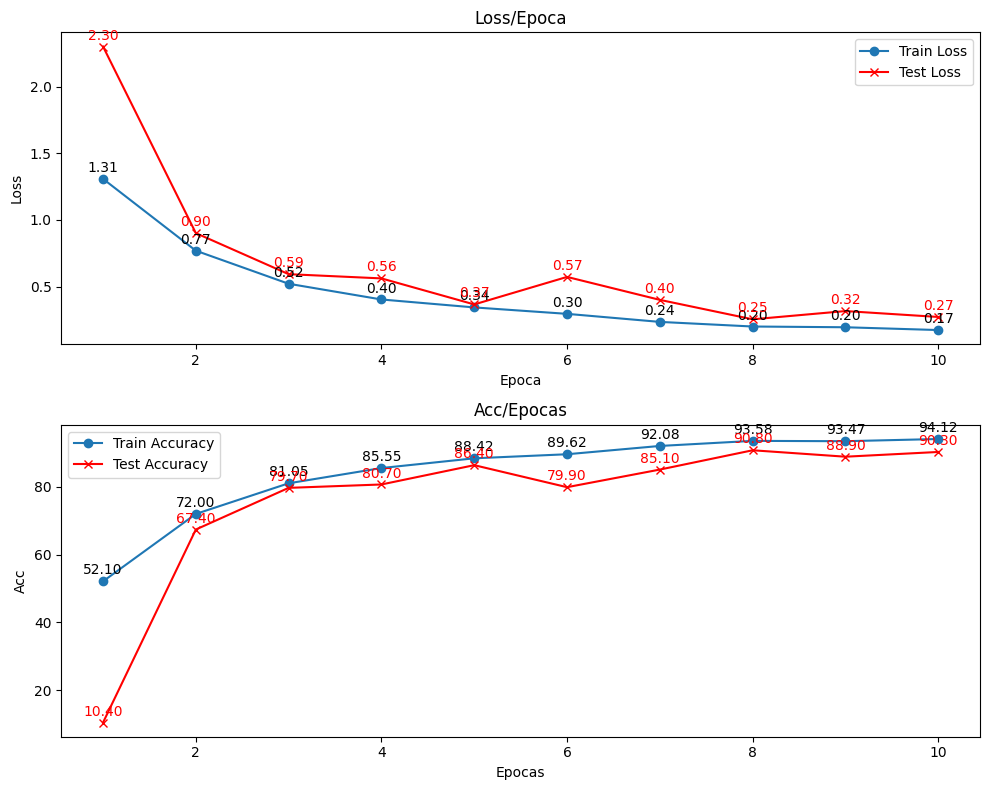

In [30]:
#ajuste no tamanho da lista
test_loss_hist = test_loss_hist[:epochs]
test_acc_hist = test_acc_hist[:epochs]

x_axis = np.arange(1, epochs + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot Loss
ax1.plot(x_axis, train_loss_hist, label='Train Loss', marker='o')
ax1.plot(x_axis, test_loss_hist, color='red', label='Test Loss', marker='x')
ax1.set_title('Loss/Epoca')
ax1.set_xlabel('Epoca')
ax1.set_ylabel('Loss')
ax1.legend()

# colocar vcalores no grafico
for i, (train_loss, test_loss) in enumerate(zip(train_loss_hist, test_loss_hist)):
    ax1.annotate(f'{train_loss:.2f}', (x_axis[i], train_loss), textcoords="offset points", xytext=(0,5), ha='center')
    ax1.annotate(f'{test_loss:.2f}', (x_axis[i], test_loss), textcoords="offset points", xytext=(0,5), ha='center', color='red')

# Plot Accuracy
ax2.plot(x_axis, train_acc_hist, label='Train Accuracy', marker='o')
ax2.plot(x_axis, test_acc_hist, color='red', label='Test Accuracy', marker='x')
ax2.set_title('Acc/Epocas')
ax2.set_xlabel('Epocas')
ax2.set_ylabel('Acc')
ax2.legend()

# colocar vcalores no grafico
for i, (train_acc, test_acc) in enumerate(zip(train_acc_hist, test_acc_hist)):
    ax2.annotate(f'{train_acc:.2f}', (x_axis[i], train_acc), textcoords="offset points", xytext=(0,5), ha='center')
    ax2.annotate(f'{test_acc:.2f}', (x_axis[i], test_acc), textcoords="offset points", xytext=(0,5), ha='center', color='red')

plt.tight_layout()
plt.show()

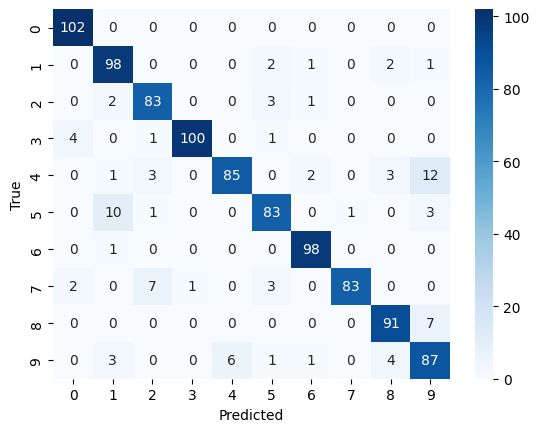

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       102
           1       0.85      0.94      0.89       104
           2       0.87      0.93      0.90        89
           3       0.99      0.94      0.97       106
           4       0.93      0.80      0.86       106
           5       0.89      0.85      0.87        98
           6       0.95      0.99      0.97        99
           7       0.99      0.86      0.92        96
           8       0.91      0.93      0.92        98
           9       0.79      0.85      0.82       102

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [28]:
# Função de avaliação do modelo
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)
            all_preds.append(preds.cpu().numpy())
            all_labels.append(y.cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Matriz de Confusão
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # report da classificacao
    print(classification_report(all_labels, all_preds))


# Avaliando o modelo no teste
evaluate_model(model, test_dataloader, device)